## Predict the salary for Data Sciense Jobs

#### Can you predict the salary that you can have in the next months :)?

Salary_datas.csv

1- EDA

2- Train-test-split

3- Entrenar, predecir, evaluar

4- Cuando esteis contentos -> Entrenar con todo


Test.csv

1- Predeciraguera y_pred

*detalle:
Todas las transformacionesen salary.csv se haran tambien en test.csv

In [1]:
'''y_pred = modelo.predict(test)
df=pd.DataFrame()
df['id']=[i for i in range(len(y_pred))]
df['prediccion']=y_pred
df.to_csv('sample.csv', index=False)'''

"y_pred = modelo.predict(test)\ndf=pd.DataFrame()\ndf['id']=[i for i in range(len(y_pred))]\ndf['prediccion']=y_pred\ndf.to_csv('sample.csv', index=False)"

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

from statistics import mean

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge



In [3]:
salaries_data = pd.read_csv('salaries_data.csv')
salaries_data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L


In [4]:
dimension_original_salaries_data = salaries_data.shape
print('dimension actual salaries:', salaries_data.shape, '\ndimension original salaries:', dimension_original_salaries_data)

dimension actual salaries: (500, 9) 
dimension original salaries: (500, 9)


In [5]:
test = pd.read_csv('test.csv')
test.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,US,100,US,L
2,2020,MI,FT,Data Analyst,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,IN,100,IN,L


In [6]:
dimension_original_test = test.shape
print('dimension actual salaries:', test.shape, '\ndimension original salaries:', dimension_original_test)

dimension actual salaries: (107, 8) 
dimension original salaries: (107, 8)


In [7]:
salaries_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [8]:
test.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

<AxesSubplot:>

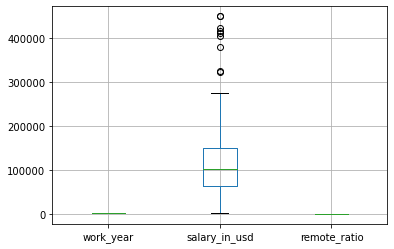

In [9]:
salaries_data.boxplot()

# SEPARAMOS DE LA COLUMNA DE SALARY Y CONCATENAMOS CON EL TEST

In [10]:
X_salaries_data = salaries_data.drop('salary_in_usd', axis=1)
y_salaries_data = salaries_data.salary_in_usd
X_salaries_data.shape, y_salaries_data.shape

((500, 8), (500,))

In [11]:
data = pd.concat([X_salaries_data,test])
dimension_original_data = data.shape
print('dimension actual data:', data.shape, '\ndimension original data:', dimension_original_data)

dimension actual data: (607, 8) 
dimension original data: (607, 8)


In [12]:
data.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,US,100,US,M
1,2022,SE,FT,Data Engineer,US,100,US,M
2,2021,MI,FT,BI Data Analyst,US,100,US,M
3,2021,MI,CT,ML Engineer,US,100,US,L
4,2021,MI,FT,Data Engineer,RO,0,US,L


In [13]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,607,3,M,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# WORK_YEAR
Convertirlo a objeto / 0,1,2 / Normalizarlo

In [14]:
data.work_year.value_counts()
#inutil cambiarlo a 0, 1, 2 ? 

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [15]:
data.work_year = data.work_year.apply(lambda x: str(x))

# EXPERIENCE_LEVEL

In [16]:
print('SE:', salaries_data[salaries_data.experience_level == 'SE'].salary_in_usd.mean())
print('MI:', salaries_data[salaries_data.experience_level == 'MI'].salary_in_usd.mean())
print('EN:', salaries_data[salaries_data.experience_level == 'EN'].salary_in_usd.mean())
print('EX:', salaries_data[salaries_data.experience_level == 'EX'].salary_in_usd.mean())

SE: 136341.79423868313
MI: 90384.61046511628
EN: 59989.56923076923
EX: 196078.85


In [17]:
data.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [18]:
data.experience_level.replace({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}, inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,2,FT,Data Engineer,US,100,US,M
1,2022,2,FT,Data Engineer,US,100,US,M
2,2021,1,FT,BI Data Analyst,US,100,US,M
3,2021,1,CT,ML Engineer,US,100,US,L
4,2021,1,FT,Data Engineer,RO,0,US,L


# EMPLOYMENT_TYPE

In [19]:
data.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

# JOB_TITLE

In [20]:
data.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
BI Data Analyst                               6
ML Engineer                                   6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [21]:
new = []
for server in data.job_title:
    if 'scien' in server.lower():
        new.append('Data Scientist')
    elif 'engine' in server.lower():
        new.append('Data Engineer')
    elif 'analy' in server.lower():
        new.append('Data Analyst')
    elif 'archi' in server.lower():
        new.append('Data Architect')
    elif 'machi' in server.lower():
        new.append('Machine Learning')
    else: new.append('Other')
data.job_title = new
data.job_title.value_counts()

Data Engineer       227
Data Scientist      227
Data Analyst        127
Data Architect       12
Other                 9
Machine Learning      5
Name: job_title, dtype: int64

In [22]:
data.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,2,FT,Data Engineer,US,100,US,M
1,2022,2,FT,Data Engineer,US,100,US,M
2,2021,1,FT,Data Analyst,US,100,US,M
3,2021,1,CT,Data Engineer,US,100,US,L
4,2021,1,FT,Data Engineer,RO,0,US,L


# EMPLOYEE_RESIDENCE
### ¿ELIMINABLE?
EL SUELDO NO SUELE VARIAR EN FUNCION DE DONDE VIVES, SINO EN FUNCION DE DONDE ESTA LA EMPRESA

In [23]:
distinto=0
igual=0
for i, e in enumerate(data.employee_residence):
    if data.employee_residence.iloc[i] != data.company_location.iloc[i]:
        distinto+=1
    else: igual +=1
print('distinto:', round(distinto*100/(igual+distinto),2), '%')
print('igual:', round(igual*100/(igual+distinto),2), '%')

distinto: 8.4 %
igual: 91.6 %


In [24]:
data = data.drop(['employee_residence'], axis = 1)

In [25]:
#PRACTICAMENTE TODOS LOS TRABAJADORES RESIDEN EN EL LUGAR DE LA COMPAÑIA

data.employee_residence.value_counts()

top_15 = pd.DataFrame(data.employee_residence.value_counts())[:15]
top_15.plot.bar()

data.employee_residence = ['OTHER' if c not in top_15.index else c for c in data.employee_residence]
pd.DataFrame(data.employee_residence.value_counts()).plot.bar()

## REMOTE RATIO
MEJOR NORMALIZAR?, 0-50-100, 0-1-2, CERO-HALF-FULL

In [26]:
data.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [27]:
data.remote_ratio.replace({0: 'CERO', 50: 'HALF', 100: 'FULL'}, inplace=True)

# COMPANY LOCATION

In [28]:
len(data.company_location.value_counts())

50

In [29]:
data.company_location.unique()

array(['US', 'FR', 'GR', 'LU', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP',
       'CA', 'AS', 'IE', 'AE', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH', 'CL',
       'CN', 'DK', 'TR', 'NZ', 'PL', 'UA', 'AU', 'NG', 'EE', 'CZ', 'AT',
       'BR', 'DZ', 'IR', 'NL', 'HU', 'PT', 'HN', 'MT', 'RO', 'SG', 'IT',
       'HR', 'IQ', 'IL', 'RU', 'CO', 'MY'], dtype=object)

In [30]:
data.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PT      4
AT      4
PL      4
NL      4
PK      3
DK      3
AU      3
BR      3
AE      3
TR      3
LU      3
MX      3
CH      2
IT      2
CZ      2
RU      2
BE      2
SI      2
NG      2
CN      2
MT      1
HN      1
IL      1
RO      1
SG      1
CO      1
IQ      1
HR      1
NZ      1
HU      1
IR      1
DZ      1
EE      1
UA      1
CL      1
KE      1
VN      1
IE      1
AS      1
MD      1
MY      1
Name: company_location, dtype: int64

<AxesSubplot:>

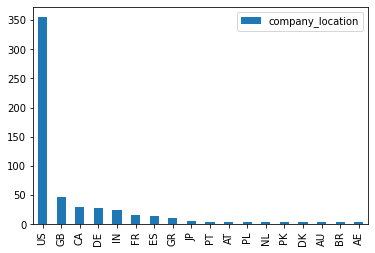

In [31]:
top_paises = pd.DataFrame(data.company_location.value_counts())[:18]
top_paises.plot.bar()

In [32]:
top_paises.index

Index(['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'PT', 'AT', 'PL',
       'NL', 'PK', 'DK', 'AU', 'BR', 'AE'],
      dtype='object')

<AxesSubplot:>

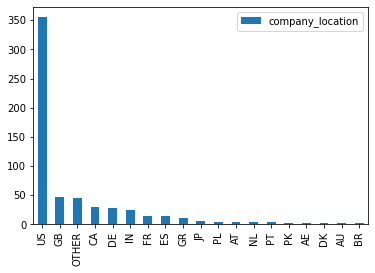

In [33]:
data.company_location = ['OTHER' if c not in top_paises.index else c for c in data.company_location]
pd.DataFrame(data.company_location.value_counts()).plot.bar()

In [34]:
salario_medio_pais = {'US': 3600, 'FR': 3201,'GR': 1407, 'LU': 3400, 'SI': 1990,
                        'DE': 3393, 'IN': 1454, 'GB': 2997, 'PK': 747, 'MD': 1162,
                        'JP': 2808, 'CA': 3082, 'AS': 2282, 'IE': 3016, 'AE': 4302,
                        'MX': 1123, 'VN': 1388, 'BE': 2779, 'KE': 986, 'ES': 2280,
                        'CH': 5000, 'CL': 1085, 'CN': 1819, 'DK': 5550, 'TR': 1371,
                        'NZ': 3050, 'PL': 1441, 'UA': 1710, 'AU': 3599, 'NG': 455,
                        'EE': 2299, 'CZ': 2282, 'AT': 2777, 'BR': 800, 'DZ': 905,
                        'IR': 1768, 'NL': 3458, 'HU': 1876, 'PT': 1461, 'HN': 1134,
                        'MT': 1914, 'RO': 1751, 'SG': 6550, 'IT': 2143, 'HR': 1827,
                        'IQ': 1324, 'IL': 2528, 'RU': 1790, 'CO': 861, 'MY': 2195}

salario_medio_pais['OTHER'] = int(round(mean([salario_medio_pais[i] for i in top_paises.index]),0))

new = []
for i, e  in enumerate(data.work_year):
    new.append(salario_medio_pais[data.company_location.iloc[i]])
data['salario_medio_pais'] = new
data.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size,salario_medio_pais
0,2022,2,FT,Data Engineer,FULL,US,M,3600
1,2022,2,FT,Data Engineer,FULL,US,M,3600
2,2021,1,FT,Data Analyst,FULL,US,M,3600
3,2021,1,CT,Data Engineer,FULL,US,L,3600
4,2021,1,FT,Data Engineer,CERO,US,L,3600


# COMPANY SIZE

In [35]:
data.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [36]:
data.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size,salario_medio_pais
0,2022,2,FT,Data Engineer,FULL,US,M,3600
1,2022,2,FT,Data Engineer,FULL,US,M,3600
2,2021,1,FT,Data Analyst,FULL,US,M,3600
3,2021,1,CT,Data Engineer,FULL,US,L,3600
4,2021,1,FT,Data Engineer,CERO,US,L,3600


In [37]:
X_salaries_data = data[:len(X_salaries_data)]
test = data[len(X_salaries_data):]
salaries_data = pd.concat([X_salaries_data,y_salaries_data], axis = 1)



## TEST DE TUKEY PARA FILTRAR OUTLIERS de salary por paises

In [38]:
def test_tukey(data, column, cota = 0.25):

    iqr = data[column].quantile(1-cota) - data[column].quantile(cota)
    cutoff = iqr * 1.5
    lower =  data[column].quantile(cota) - cutoff
    upper = data[column].quantile(1-cota) + cutoff
    data.drop(data[(data[column] < lower) | (data[column] > upper)].index, axis=0, inplace = True)
    
    return data

In [39]:
for pais in top_paises.index.unique():
    test_tukey(salaries_data[salaries_data.company_location == pais], 'salary_in_usd')

In [40]:
X_salaries_data = salaries_data.drop('salary_in_usd', axis=1)
y_salaries_data = salaries_data.salary_in_usd
X_salaries_data.shape, y_salaries_data.shape

((500, 8), (500,))

In [41]:
data = pd.concat([X_salaries_data,test])

# NORMALIZAR / ETIQUETAR

In [42]:
data = pd.get_dummies(data)
data.shape

(607, 40)

In [43]:
data.head()

,experience_level,salario_medio_pais,work_year_2020,work_year_2021,work_year_2022,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning,job_title_Other,remote_ratio_CERO,remote_ratio_FULL,remote_ratio_HALF,company_location_AE,company_location_AT,company_location_AU,company_location_BR,company_location_CA,company_location_DE,company_location_DK,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IN,company_location_JP,company_location_NL,company_location_OTHER,company_location_PK,company_location_PL,company_location_PT,company_location_US,company_size_L,company_size_M,company_size_S
0,2,3600,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,3600,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,3600,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,3600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,3600,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


# SEPARAMOS SALARIES_DATA DE TEST

In [44]:
X_salaries_data.shape , test.shape

((500, 8), (107, 8))

In [45]:
#data = pd.concat([X_salaries_data,test])
X_salaries_data = data[:len(X_salaries_data)]
test = data[len(X_salaries_data):]

In [46]:
X_salaries_data.shape , test.shape

((500, 40), (107, 40))

In [47]:
salaries_data = pd.concat([X_salaries_data,y_salaries_data], axis = 1)

In [48]:
X_salaries_data.shape, y_salaries_data.shape, test.shape

((500, 40), (500,), (107, 40))

# CREAMOS MODELO, ENTRENAMOS Y PREDECIMOS

In [49]:
X_salaries_data.shape, y_salaries_data.shape

((500, 40), (500,))

In [50]:
#X_train, X_test,y_train, y_test = tts(X_salaries_data, y_salaries_data, train_size=0.8, test_size=0.2)
X_train, X_test,y_train, y_test = tts(X_salaries_data, y_salaries_data, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Your code here:


((400, 40), (100, 40), (400,), (100,))

In [51]:
modelos = [LogisticRegression(max_iter=2000)
           , LinearRegression()
           , Ridge(alpha=.5)
           , RidgeCV(alphas=np.logspace(-6, 6, 13))
           , Lasso(alpha=0.1)
           , LassoLars(alpha=.1, normalize=False)
           , BayesianRidge()
          ]

errores = pd.DataFrame(columns = ['Modelo', 'Acierto exacto (%)', 'RMSE', 'MSE', 'MAE', 'R2'])
for i in modelos:
    reg = i
    reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test)
    #y_prob=reg.predict_proba(X_test)

    accuracy = sum(y_pred==y_test)/y_pred.shape[0] * 100
    
    errores = errores.append({'Modelo': i
                              , 'Acierto exacto (%)': round(accuracy, 2)
                              , 'RMSE': mse(y_test, y_pred, squared=False)
                              , 'MSE': mse(y_test, y_pred)
                              , 'MAE': mae(y_test, y_pred)
                              , 'R2': r2(y_test, y_pred)
                             }, ignore_index=True)

coef_R2_RMSE = []
maximo = 0
best = None
for i, e in enumerate(errores.RMSE):
    coef = errores.R2.iloc[i] / e
    coef_R2_RMSE.append(coef)
    if coef >= maximo: 
        best = errores.Modelo.iloc[i]
        maximo = coef
print('best model:', best)

reg = best
reg.fit(X_salaries_data, y_salaries_data)
y_pred=reg.predict(test)
    
errores['coef_R2_RMSE'] = coef_R2_RMSE
errores

best model: Ridge(alpha=0.5)


,Modelo,Acierto exacto (%),RMSE,MSE,MAE,R2,coef_R2_RMSE
0,LogisticRegression(max_iter=2000),3.0,52469.814774,2753081462.47,41249.53,0.135248,0.000003
1,LinearRegression(),0.0,37951.656173,1440328206.289418,29503.144409,0.547588,0.000014
2,Ridge(alpha=0.5),0.0,37498.258436,1406119385.725299,29580.822936,0.558333,0.000015
3,"RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, ...",0.0,38068.067718,1449177779.764123,29647.145602,0.544809,0.000014
4,Lasso(alpha=0.1),0.0,40194.462258,1615594796.200163,30468.168054,0.492536,0.000012
5,"LassoLars(alpha=0.1, normalize=False)",0.0,38280.201585,1465373833.361146,29735.399412,0.539721,0.000014
6,BayesianRidge(),0.0,51747.351999,2677788438.896226,42296.785188,0.158898,0.000003


In [52]:
errores = pd.read_csv('errores.csv')
errores.head()

,Modelo,Cota,Num Paises,Acierto exacto (%),RMSE,MSE,MAE,R2
0,LogisticRegression(max_iter=2000),0.0,1,2.0,53637.547057,2.876986e+09,42511.280000,0.096329
1,LinearRegression(),0.0,1,0.0,38205.677382,1.459674e+09,28249.205788,0.541512
2,Ridge(alpha=0.5),0.0,1,0.0,37743.099176,1.424542e+09,28143.807608,0.552547
3,"RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, ...",0.0,1,0.0,38007.568442,1.444575e+09,28016.655443,0.546254
4,Lasso(alpha=0.1),0.0,1,0.0,38204.823432,1.459609e+09,28248.712817,0.541532


In [53]:
errores[errores.RMSE == min(errores.RMSE)]

,Modelo,Cota,Num Paises,Acierto exacto (%),RMSE,MSE,MAE,R2
16631,BayesianRidge(),0.48,24,0.0,2912.247531,8.481186e+06,2439.626717,-0.162788


# R2 negativo!

In [54]:
errores[errores.R2>0][errores.Cota<0.3].sort_values(by = 'RMSE', ascending = True)

,Modelo,Cota,Num Paises,Acierto exacto (%),RMSE,MSE,MAE,R2
3722,"LassoLars(alpha=0.1, normalize=False)",0.10,42,0.00,30023.953533,9.014378e+08,24255.310601,0.702076
4065,"LassoLars(alpha=0.1, normalize=False)",0.11,42,0.00,30023.953533,9.014378e+08,24255.310601,0.702076
3701,"LassoLars(alpha=0.1, normalize=False)",0.10,39,0.00,30139.203896,9.083716e+08,24303.615024,0.699784
4044,"LassoLars(alpha=0.1, normalize=False)",0.11,39,0.00,30139.203896,9.083716e+08,24303.615024,0.699784
4072,"LassoLars(alpha=0.1, normalize=False)",0.11,43,0.00,30216.570848,9.130412e+08,24422.196026,0.698241
...,...,...,...,...,...,...,...,...
4830,LogisticRegression(max_iter=2000),0.14,5,2.02,57097.693511,3.260147e+09,44887.929293,0.011813
5173,LogisticRegression(max_iter=2000),0.15,5,2.02,57097.693511,3.260147e+09,44887.929293,0.011813
5516,LogisticRegression(max_iter=2000),0.16,5,2.02,57097.693511,3.260147e+09,44887.929293,0.011813
6202,LogisticRegression(max_iter=2000),0.18,5,2.02,57097.693511,3.260147e+09,44887.929293,0.011813


In [55]:
y_pred.shape

(107,)

In [56]:
reg = LinearRegression()
reg.fit(X_salaries_data, y_salaries_data)
y_pred=reg.predict(test)

In [57]:
sample = pd.DataFrame()
sample['id'] = [i for i in range(107)]
sample['salary_in_usd'] = y_pred
sample.to_csv('sample.csv', index=False)

In [58]:
X_salaries_data.columns

Index(['experience_level', 'salario_medio_pais', 'work_year_2020',
       'work_year_2021', 'work_year_2022', 'employment_type_CT',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'job_title_Data Analyst', 'job_title_Data Architect',
       'job_title_Data Engineer', 'job_title_Data Scientist',
       'job_title_Machine Learning', 'job_title_Other', 'remote_ratio_CERO',
       'remote_ratio_FULL', 'remote_ratio_HALF', 'company_location_AE',
       'company_location_AT', 'company_location_AU', 'company_location_BR',
       'company_location_CA', 'company_location_DE', 'company_location_DK',
       'company_location_ES', 'company_location_FR', 'company_location_GB',
       'company_location_GR', 'company_location_IN', 'company_location_JP',
       'company_location_NL', 'company_location_OTHER', 'company_location_PK',
       'company_location_PL', 'company_location_PT', 'company_location_US',
       'company_size_L', 'company_size_M', 'company_size_S'],
  

In [59]:
# varias variables

x=sm.add_constant(X_salaries_data)
y=y_salaries_data
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     14.78
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.82e-53
Time:                        17:24:35   Log-Likelihood:                -6105.3
No. Observations:                 500   AIC:                         1.228e+04
Df Residuals:                     466   BIC:                         1.242e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1150.1812   7834.025     -0.147      0.883   -1.65e+04    1.42e+04
experience_level            2.769e+04   3444.659      8.040      0.000    2.09e+04    3.45e+04
salario_medio_pais            13.9770      6.302      2.218      0.027       1.594      26.360
work_year_2020              9186.0218   5758.370      1.595      0.111   -2129.565    2.05e+04
work_year_2021             -7894.4516   4478.084     -1.763      0.079   -1.67e+04     905.288
work_year_2022             -2441.7514   5441.582     -0.449      0.654   -1.31e+04    8251.325
employment_type_CT          7.982e+04   2.12e+04      3.762      0.000    3.81e+04    1.22e+05
employment_type_FL         -6.708e+04   2.16e+04     -3.112      0.002   -1.09e+05   -2.47e+04
employment_type_FT          2030.9681   9859.913      0.206      0.837   -1.73e+04    2.14e+04
employment_type_PT         -1.592e+04   1.71e+04     -0.931      0.352   -4.95e+04    1.77e+04
job_title_Data Analyst     -2.612e+04   7410.936     -3.524      0.000   -4.07e+04   -1.16e+04
job_title_Data Architect    3.167e+04   1.53e+04      2.064      0.040    1522.299    6.18e+04
job_title_Data Engineer    -4074.8745   6964.881     -0.585      0.559   -1.78e+04    9611.588
job_title_Data Scientist    6738.7186   6854.818      0.983      0.326   -6731.463    2.02e+04
job_title_Machine Learning -1.981e+04   2.29e+04     -0.864      0.388   -6.49e+04    2.52e+04
job_title_Other             1.044e+04   1.66e+04      0.630      0.529   -2.22e+04     4.3e+04
remote_ratio_CERO          -2828.7274   4959.281     -0.570      0.569   -1.26e+04    6916.595
remote_ratio_FULL           3631.2240   4474.768      0.811      0.417   -5161.998    1.24e+04
remote_ratio_HALF          -1952.6778   5617.355     -0.348      0.728    -1.3e+04    9085.805
company_location_AE        -5739.0431   2.81e+04     -0.204      0.838    -6.1e+04    4.96e+04
company_location_AT        -1.233e+04   2.86e+04     -0.431      0.667   -6.86e+04    4.39e+04
company_location_AU         1.574e+04   3.43e+04      0.458      0.647   -5.18e+04    8.32e+04
company_location_BR        -3.061e+04   3.23e+04     -0.949      0.343    -9.4e+04    3.28e+04
company_location_CA         1.391e+04   1.25e+04      1.117      0.264   -1.06e+04    3.84e+04
company_location_DE         3334.9649   1.28e+04      0.260      0.795   -2.19e+04    2.86e+04
company_location_DK        -3.175e+04   3.62e+04     -0.877      0.381   -1.03e+05    3.94e+04
company_location_ES        -6035.1012    1.5e+04     -0.403      0.687   -3.55e+04    2.34e+04
company_location_FR        -3154.0548   1.61e+04     -0.196      0.844   -3.47e+04    2.84e+04
company_location_GB         1.021e+04   1.01e+04      1.012      0.312   -9622.883       3e+04
company_location_GR          1.11e+04   1.7

In [60]:
modelo.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                      OLS                     Adj. R-squared:            0.477     
Dependent Variable:         salary_in_usd           AIC:                       12278.5936
Date:                       2022-09-26 17:24        BIC:                       12421.8903
No. Observations:           500                     Log-Likelihood:            -6105.3   
Df Model:                   33                      F-statistic:               14.78     
Df Residuals:               466                     Prob (F-statistic):        1.82e-53  
R-squared:                  0.511                   Scale:                     2.5357e+09
-----------------------------------------------------------------------------------------
                              Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------------
const                       -1150.1812  7834.0245 -0.1468 0.8833  -16544.5699  14244.2075
experience_level            27693.7977  3444.6590  8.0396 0.0000   20924.8094  34462.7859
salario_medio_pais             13.9770     6.3017  2.2180 0.0270       1.5937     26.3602
work_year_2020               9186.0218  5758.3701  1.5952 0.1113   -2129.5653  20501.6090
work_year_2021              -7894.4516  4478.0845 -1.7629 0.0786  -16694.1908    905.2877
work_year_2022              -2441.7514  5441.5819 -0.4487 0.6538  -13134.8283   8251.3254
employment_type_CT          79820.1795 21219.0569  3.7617 0.0002   38123.2958 121517.0632
employment_type_FL         -67079.9869 21555.5246 -3.1120 0.0020 -109438.0525 -24721.9213
employment_type_FT           2030.9681  9859.9132  0.2060 0.8369  -17344.4290  21406.3652
employment_type_PT         -15921.3418 17098.4146 -0.9312 0.3523  -49520.8843  17678.2007
job_title_Data Analyst     -26118.8492  7410.9359 -3.5244 0.0005  -40681.8402 -11555.8583
job_title_Data Architect    31674.5451 15344.1255  2.0643 0.0395    1522.2994  61826.7907
job_title_Data Engineer     -4074.8745  6964.8810 -0.5851 0.5588  -17761.3372   9611.5882
job_title_Data Scientist     6738.7186  6854.8182  0.9831 0.3261   -6731.4633  20208.9005
job_title_Machine Learning -19814.7020 22922.5913 -0.8644 0.3878  -64859.1461  25229.7422
job_title_Other             10444.9809 16588.8365  0.6296 0.5292  -22153.2063  43043.1680
remote_ratio_CERO           -2828.7274  4959.2806 -0.5704 0.5687  -12574.0496   6916.5948
remote_ratio_FULL            3631.2240  4474.7680  0.8115 0.4175   -5161.9981  12424.4462
remote_ratio_HALF           -1952.6778  5617.3547 -0.3476 0.7283  -12991.1601   9085.8046
company_location_AE         -5739.0431 28138.7218 -0.2040 0.8385  -61033.5368  49555.4507
company_location_AT        -12327.9118 28631.3773 -0.4306 0.6670  -68590.5070  43934.6834
company_location_AU         15740.6178 34349.8604  0.4582 0.6470  -51759.1839  83240.4195
company_location_BR        -30607.7527 32262.8687 -0.9487 0.3433  -94006.4745  32790.9690
company_location_CA         13913.2027 12450.4194  1.1175 0.2644  -10552.7145  38379.1200
company_location_DE          3334.9649 12838.6369  0.2598 0.7952  -21893.8261  28563.7558
company_location_DK        -31751.4001 36211.8580 -0.8768 0.3810 -102910.1533  39407.3531
company_location_ES         -6035.1012 14992.4970 -0.4025 0.6875  -35496.3731  23426.1707
company_location_FR         -3154.0548 16062.7337 -0.1964 0.8444  -34718.4143  28410.3046
company_location_GB         10210.7486 10093.1034  1.0117 0.3122   -9622.8831  30044.3803
company_location_GR         11102.3414 17063.3214  0.6507 0.5156  -22428.2406  44632.9234
company_location_IN        -14853.3537 13357.0209 -1.1120 0.2667  -41100.8043  11394.0969
company_location_JP         39917.1572 25456.0487  1.5681 0.1175  -10105.7022  89940.0167
company_location_NL 

In [61]:
print( errrorrrrrr )

NameError: name 'errrorrrrrr' is not defined

# SALARY IN USD
¿Ayudaria quitar outliers del salaries_data?

In [ ]:
salaries_data.salary_in_usd.value_counts()

In [ ]:
sns.violinplot(x=y_salaries_data.salary_in_usd);

In [ ]:
sns.boxplot(x=y_salaries_data.salary_in_usd);

In [ ]:
sns.histplot(x=data.salary_in_usd, bins=10)   # bins=nº de barras
plt.axvline(data.salary_in_usd.mean(),c='r',linewidth=3.,linestyle='--',label='media de salario')
plt.axvline(data.salary_in_usd.median(),c='orange',linewidth=3.,linestyle='--',label='mediana de salario')
plt.axvline(data.salary_in_usd.mode()[0],c='black',linewidth=3.,linestyle='--',label='moda de salario')
plt.title('Histograma de Salarios en usd')
plt.xlabel('Usd')
plt.ylabel('Frecuencia')
plt.legend()
plt.show();

In [ ]:
# varias variables

x=sm.add_constant(data)
y=y_salaries_data
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()